# EDA of "Capybaras" Capstone project
## Animal species image recognition in Côte d'Ivoire's Jungle


In [2]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt



First we can visually inspect the photos of the folders "test_features" and "train_features". There are photos shot with automatical camera in jungle. There are animals on some pictures. From the challenge description, that are always only one species on the picture, otherwise no species. Pictures are in different sizes and some picture are RGB, others are black/white.

In [9]:
# Load the CSV data into a pandas DataFrame

#Lets take  a look at the both train and test data
train_df = pd.read_csv('/Users/alexandersimakov/Documents/CAPSTONE/ds-capstone-project/data/train_features.csv')
train_df.head()

,id,filepath,site
0,ZJ000000,train_features/ZJ000000.jpg,S0120
1,ZJ000001,train_features/ZJ000001.jpg,S0069
2,ZJ000002,train_features/ZJ000002.jpg,S0009
3,ZJ000003,train_features/ZJ000003.jpg,S0008
4,ZJ000004,train_features/ZJ000004.jpg,S0036


In [15]:
#Lets alsko take a look at the test data
test_df = pd.read_csv('/Users/alexandersimakov/Documents/CAPSTONE/ds-capstone-project/data/test_features.csv')
#test_df.info()
test_df.head()

,id,filepath,site
0,ZJ016488,test_features/ZJ016488.jpg,S0082
1,ZJ016489,test_features/ZJ016489.jpg,S0040
2,ZJ016490,test_features/ZJ016490.jpg,S0040
3,ZJ016491,test_features/ZJ016491.jpg,S0041
4,ZJ016492,test_features/ZJ016492.jpg,S0040


In [13]:
#Lets also take a look at the train labels
train_labels_df = pd.read_csv('/Users/alexandersimakov/Documents/CAPSTONE/ds-capstone-project/data/train_labels.csv')
train_labels_df.head()


,id,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
0,ZJ000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ZJ000001,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,ZJ000002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ZJ000003,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,ZJ000004,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


We can see, that train/test_features.csv do have photos IDs, filepath of the photos and site where they were shot on.

"Train_labels.csv" do have photo IDs and 8 another different column for each species (0 or 1).

First we want do find out how much photos are in color and how much are black/white. For that I choose one (not to big) site, to inspect it. So lets see how much photos were shot in each site (test_features.csv).

site
S0040    495
S0162    359
S0072    312
S0128    258
S0116    251
S0086    225
S0100    207
S0033    180
S0114    169
S0064    159
S0041    153
S0082    131
S0037    130
S0067    111
S0111    109
S0065     87
S0142     85
S0126     80
S0012     76
S0199     68
S0189     67
S0091     65
S0066     64
S0011     54
S0151     51
S0055     51
S0039     49
S0087     43
S0052     39
S0194     37
S0118     36
S0166     29
S0132     29
S0165     24
S0034     24
S0145     23
S0057     21
S0058     17
S0135     17
S0168     14
S0140     10
S0048     10
S0109      9
S0103      9
S0152      6
S0154      6
S0099      4
S0187      4
S0181      4
S0195      2
S0090      1
Name: count, dtype: int64


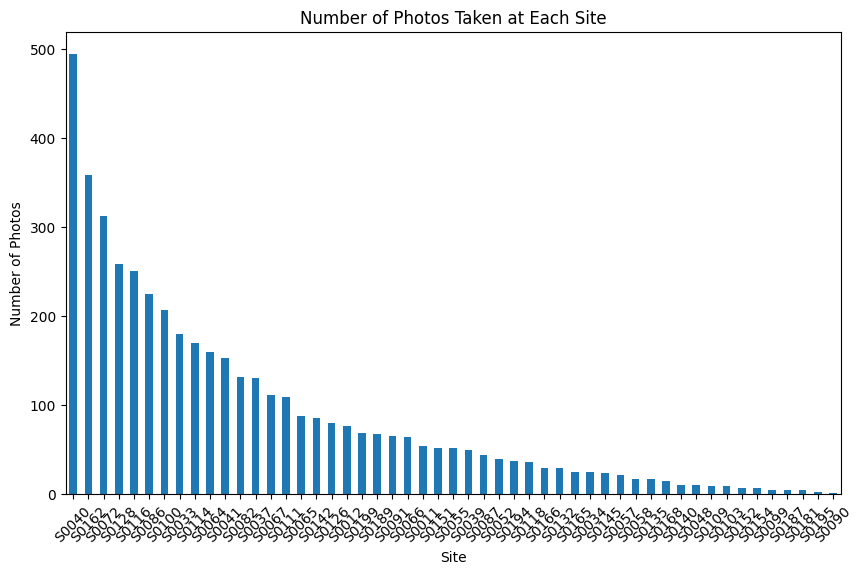

In [16]:

# Group by the 'site' column and count the number of images for each site
site_counts = test_df['site'].value_counts()

# Display the counts
print(site_counts)

# Plot the distribution of photos per site
plt.figure(figsize=(10, 6))
site_counts.plot(kind='bar')
plt.title('Number of Photos Taken at Each Site')
plt.xlabel('Site')
plt.ylabel('Number of Photos')
plt.xticks(rotation=45)
plt.show()


I choose site S0011, as it has only 54 photos - just right amount for research purposes.

Lets find out which exactly photos were shot in this site.

I also assume for our model it has no difference on which Site the photo was shot.


In [24]:
from PIL import Image
# Filter the DataFrame for the specific site "S0011"
site_data = test_df[test_df['site'] == 'S0011']

# Display the first few rows to ensure it's filtered correctly
print(site_data)



            id                    filepath   site
42    ZJ016530  test_features/ZJ016530.jpg  S0011
64    ZJ016552  test_features/ZJ016552.jpg  S0011
87    ZJ016575  test_features/ZJ016575.jpg  S0011
656   ZJ017144  test_features/ZJ017144.jpg  S0011
667   ZJ017155  test_features/ZJ017155.jpg  S0011
795   ZJ017283  test_features/ZJ017283.jpg  S0011
803   ZJ017291  test_features/ZJ017291.jpg  S0011
839   ZJ017327  test_features/ZJ017327.jpg  S0011
858   ZJ017346  test_features/ZJ017346.jpg  S0011
870   ZJ017358  test_features/ZJ017358.jpg  S0011
969   ZJ017457  test_features/ZJ017457.jpg  S0011
996   ZJ017484  test_features/ZJ017484.jpg  S0011
1115  ZJ017603  test_features/ZJ017603.jpg  S0011
1203  ZJ017691  test_features/ZJ017691.jpg  S0011
1245  ZJ017733  test_features/ZJ017733.jpg  S0011
1367  ZJ017855  test_features/ZJ017855.jpg  S0011
1398  ZJ017886  test_features/ZJ017886.jpg  S0011
1418  ZJ017906  test_features/ZJ017906.jpg  S0011
1423  ZJ017911  test_features/ZJ017911.jpg  S0011


Than we take all the file paths for S0011 Site and put them in freshly created "file_paths.txt" (Consider that file paths are right for the specific machine you are working on).

After that we will copy all this photos to a freshly created folder called "file_recognition"

In [27]:
import os
import shutil

# Path to the text file containing the list of files to copy
file_list_path = '/Users/alexandersimakov/Documents/CAPSTONE/ds-capstone-project/data/file_paths.txt' #paths are right on my machine only

# Path to the destination folder
destination_folder = '/Users/alexandersimakov/Documents/CAPSTONE/ds-capstone-project/data/color_recognition' #paths are right on my machine only

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Read file paths from the text file
with open(file_list_path, 'r') as file:
    file_paths = file.readlines()

# Remove any trailing newline characters from the file paths
file_paths = [line.strip() for line in file_paths]

# Copy each file to the destination folder
for file_path in file_paths:
    if os.path.isfile(file_path):
        shutil.copy(file_path, destination_folder)
        print(f'Copied {file_path} to {destination_folder}')
    else:
        print(f'File not found: {file_path}')

print('All files copied!')

Copied /Users/alexandersimakov/Documents/CAPSTONE/competition/test_features/ZJ016530.jpg to /Users/alexandersimakov/Documents/CAPSTONE/ds-capstone-project/data/color_recognition
Copied /Users/alexandersimakov/Documents/CAPSTONE/competition/test_features/ZJ016552.jpg to /Users/alexandersimakov/Documents/CAPSTONE/ds-capstone-project/data/color_recognition
Copied /Users/alexandersimakov/Documents/CAPSTONE/competition/test_features/ZJ016575.jpg to /Users/alexandersimakov/Documents/CAPSTONE/ds-capstone-project/data/color_recognition
Copied /Users/alexandersimakov/Documents/CAPSTONE/competition/test_features/ZJ017144.jpg to /Users/alexandersimakov/Documents/CAPSTONE/ds-capstone-project/data/color_recognition
Copied /Users/alexandersimakov/Documents/CAPSTONE/competition/test_features/ZJ017155.jpg to /Users/alexandersimakov/Documents/CAPSTONE/ds-capstone-project/data/color_recognition
Copied /Users/alexandersimakov/Documents/CAPSTONE/competition/test_features/ZJ017283.jpg to /Users/alexandersi

Now we can explore with PIL if pictures are RGB, Black/White or overexposed(almost white).

/Users/alexandersimakov/Documents/CAPSTONE/competition/test_features/ZJ016530.jpg: RGB
/Users/alexandersimakov/Documents/CAPSTONE/competition/test_features/ZJ016552.jpg: RGB
/Users/alexandersimakov/Documents/CAPSTONE/competition/test_features/ZJ016575.jpg: Black/White
/Users/alexandersimakov/Documents/CAPSTONE/competition/test_features/ZJ017144.jpg: RGB
/Users/alexandersimakov/Documents/CAPSTONE/competition/test_features/ZJ017155.jpg: Black/White
/Users/alexandersimakov/Documents/CAPSTONE/competition/test_features/ZJ017283.jpg: RGB
/Users/alexandersimakov/Documents/CAPSTONE/competition/test_features/ZJ017291.jpg: RGB
/Users/alexandersimakov/Documents/CAPSTONE/competition/test_features/ZJ017327.jpg: RGB
/Users/alexandersimakov/Documents/CAPSTONE/competition/test_features/ZJ017346.jpg: RGB
/Users/alexandersimakov/Documents/CAPSTONE/competition/test_features/ZJ017358.jpg: RGB
/Users/alexandersimakov/Documents/CAPSTONE/competition/test_features/ZJ017457.jpg: RGB
/Users/alexandersimakov/Doc

<Figure size 1200x800 with 0 Axes>

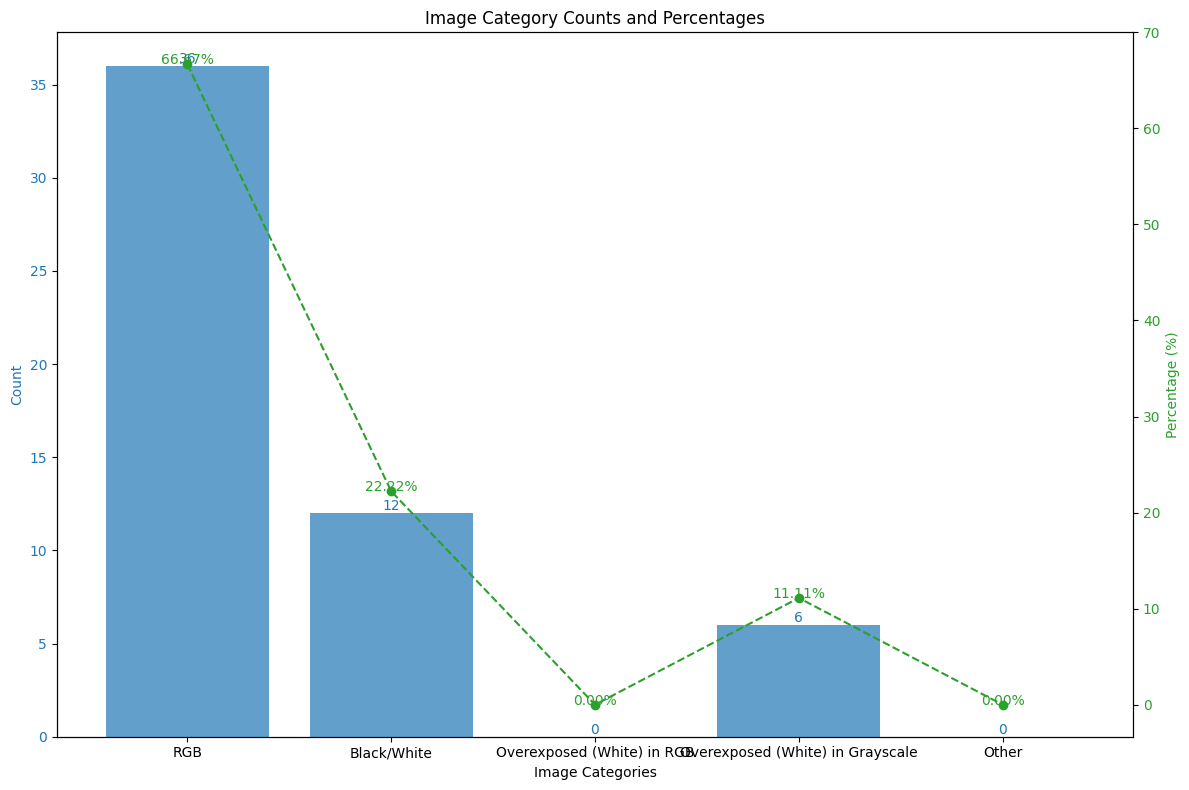

In [29]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
# Path to the text file containing the list of image paths

file_list_path = '/Users/alexandersimakov/Documents/CAPSTONE/ds-capstone-project/data/file_paths.txt'


# Read image paths from the text file
with open(file_list_path, 'r') as file:
    file_paths = file.readlines()

# Remove any trailing newline characters from the file paths
file_paths = [line.strip() for line in file_paths]

# Initialize counters for each category
counts = {
    'RGB': 0,
    'Black/White': 0,
    'Overexposed (White) in RGB': 0,
    'Overexposed (White) in Grayscale': 0,
    'Other': 0
}

# Define a function to check the mode of the image and update counts
def check_image_mode(file_path):
    try:
        with Image.open(file_path) as img:
            mode = img.mode
            if mode == 'RGB':
                result = check_rgb_image(img)
            elif mode in ['L', '1']:
                result = check_grayscale_image(img)
            else:
                result = 'Other'
            update_counts(result)
            return result
    except Exception as e:
        update_counts(f'Error: {e}')
        return f'Error: {e}'

# Define a function to check if an RGB image is overexposed
def check_rgb_image(img):
    img_array = np.array(img)
    white_pixel_threshold = 245  # Threshold for what is considered "almost white"
    white_pixels = np.sum(np.all(img_array >= white_pixel_threshold, axis=-1))
    total_pixels = img_array.shape[0] * img_array.shape[1]
    
    white_percentage = (white_pixels / total_pixels) * 100

    if white_percentage > 90:
        return 'Overexposed (White) in RGB'
    else:
        return 'RGB'

# Define a function to check if a grayscale image is overexposed
def check_grayscale_image(img):
    img_array = np.array(img)
    white_pixel_threshold = 245  # Threshold for what is considered "almost white"
    white_pixels = np.sum(img_array >= white_pixel_threshold)
    total_pixels = img_array.size
    
    white_percentage = (white_pixels / total_pixels) * 100

    if white_percentage > 90:
        return 'Overexposed (White) in Grayscale'
    else:
        return 'Black/White'

# Define a function to update counts
def update_counts(result):
    if result in counts:
        counts[result] += 1
    else:
        counts['Other'] += 1

# Check each image and print its type
for file_path in file_paths:
    result = check_image_mode(file_path)
    print(f'{file_path}: {result}')

# Print counts for each category
print("\nCounts:")
total_images = sum(counts.values())
percentages = {category: (count / total_images) * 100 for category, count in counts.items()}
for category, count in counts.items():
    print(f'{category}: {count} ({percentages[category]:.2f}%)')

# Plot the results
categories = list(counts.keys())
values = list(counts.values())
percentages_values = list(percentages.values())

plt.figure(figsize=(12, 8))

# Create a bar chart with both counts and percentages
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot counts
color = 'tab:blue'
ax1.set_xlabel('Image Categories')
ax1.set_ylabel('Count', color=color)
bars = ax1.bar(categories, values, color=color, alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)

# Add count labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2.0, height,
             f'{height}', ha='center', va='bottom', color=color)

# Create a second y-axis for percentages
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Percentage (%)', color=color)
ax2.plot(categories, percentages_values, color=color, marker='o', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# Add percentage labels on the plot
for i, percentage in enumerate(percentages_values):
    ax2.text(categories[i], percentage, f'{percentage:.2f}%', color=color, ha='center')

# Add title and show the plot
plt.title('Image Category Counts and Percentages')
fig.tight_layout()
plt.savefig('image_category_counts_with_percentages.png')
plt.show()


As we can see most of the phots are RGB.

I manually checked the results with visually inspecting the pictures, so I know for sure it works correct.
Now I can check with it all photos in "test_features".

/Users/alexandersimakov/Documents/CAPSTONE/competition/test_features/ZJ018402.jpg: RGB
/Users/alexandersimakov/Documents/CAPSTONE/competition/test_features/ZJ017731.jpg: RGB
/Users/alexandersimakov/Documents/CAPSTONE/competition/test_features/ZJ020823.jpg: RGB
/Users/alexandersimakov/Documents/CAPSTONE/competition/test_features/ZJ018364.jpg: Black/White
/Users/alexandersimakov/Documents/CAPSTONE/competition/test_features/ZJ017057.jpg: RGB
/Users/alexandersimakov/Documents/CAPSTONE/competition/test_features/ZJ020837.jpg: Black/White
/Users/alexandersimakov/Documents/CAPSTONE/competition/test_features/ZJ018370.jpg: RGB
/Users/alexandersimakov/Documents/CAPSTONE/competition/test_features/ZJ017043.jpg: RGB
/Users/alexandersimakov/Documents/CAPSTONE/competition/test_features/ZJ018416.jpg: RGB
/Users/alexandersimakov/Documents/CAPSTONE/competition/test_features/ZJ017725.jpg: RGB
/Users/alexandersimakov/Documents/CAPSTONE/competition/test_features/ZJ020189.jpg: Black/White
/Users/alexandersim

<Figure size 1200x800 with 0 Axes>

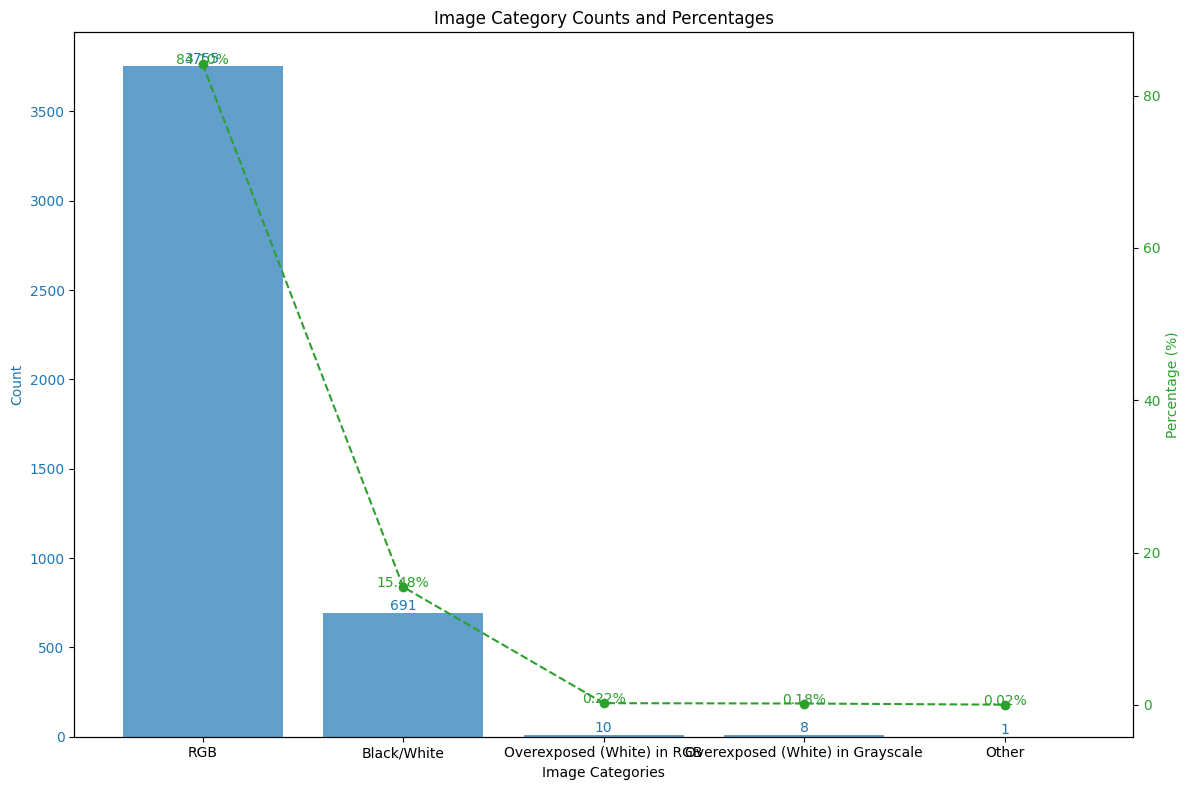

In [32]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
# Path to the text file containing the list of image paths

file_list_path = '/Users/alexandersimakov/Documents/CAPSTONE/ds-capstone-project/notebooks/test_paths.txt'


# Read image paths from the text file
with open(file_list_path, 'r') as file:
    file_paths = file.readlines()

# Remove any trailing newline characters from the file paths
file_paths = [line.strip() for line in file_paths]

# Initialize counters for each category
counts = {
    'RGB': 0,
    'Black/White': 0,
    'Overexposed (White) in RGB': 0,
    'Overexposed (White) in Grayscale': 0,
    'Other': 0
}

# Define a function to check the mode of the image and update counts
def check_image_mode(file_path):
    try:
        with Image.open(file_path) as img:
            mode = img.mode
            if mode == 'RGB':
                result = check_rgb_image(img)
            elif mode in ['L', '1']:
                result = check_grayscale_image(img)
            else:
                result = 'Other'
            update_counts(result)
            return result
    except Exception as e:
        update_counts(f'Error: {e}')
        return f'Error: {e}'

# Define a function to check if an RGB image is overexposed
def check_rgb_image(img):
    img_array = np.array(img)
    white_pixel_threshold = 245  # Threshold for what is considered "almost white"
    white_pixels = np.sum(np.all(img_array >= white_pixel_threshold, axis=-1))
    total_pixels = img_array.shape[0] * img_array.shape[1]
    
    white_percentage = (white_pixels / total_pixels) * 100

    if white_percentage > 90:
        return 'Overexposed (White) in RGB'
    else:
        return 'RGB'

# Define a function to check if a grayscale image is overexposed
def check_grayscale_image(img):
    img_array = np.array(img)
    white_pixel_threshold = 245  # Threshold for what is considered "almost white"
    white_pixels = np.sum(img_array >= white_pixel_threshold)
    total_pixels = img_array.size
    
    white_percentage = (white_pixels / total_pixels) * 100

    if white_percentage > 90:
        return 'Overexposed (White) in Grayscale'
    else:
        return 'Black/White'

# Define a function to update counts
def update_counts(result):
    if result in counts:
        counts[result] += 1
    else:
        counts['Other'] += 1

# Check each image and print its type
for file_path in file_paths:
    result = check_image_mode(file_path)
    print(f'{file_path}: {result}')

# Print counts for each category
print("\nCounts:")
total_images = sum(counts.values())
percentages = {category: (count / total_images) * 100 for category, count in counts.items()}
for category, count in counts.items():
    print(f'{category}: {count} ({percentages[category]:.2f}%)')

# Plot the results
categories = list(counts.keys())
values = list(counts.values())
percentages_values = list(percentages.values())

plt.figure(figsize=(12, 8))

# Create a bar chart with both counts and percentages
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot counts
color = 'tab:blue'
ax1.set_xlabel('Image Categories')
ax1.set_ylabel('Count', color=color)
bars = ax1.bar(categories, values, color=color, alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)

# Add count labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2.0, height,
             f'{height}', ha='center', va='bottom', color=color)

# Create a second y-axis for percentages
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Percentage (%)', color=color)
ax2.plot(categories, percentages_values, color=color, marker='o', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# Add percentage labels on the plot
for i, percentage in enumerate(percentages_values):
    ax2.text(categories[i], percentage, f'{percentage:.2f}%', color=color, ha='center')

# Add title and show the plot
plt.title('Image Category Counts and Percentages')
fig.tight_layout()
plt.savefig('image_category_counts_with_percentages.png')
plt.show()


As we can see most of the pictures (84.10%) are RGB.

After visual inspection I recognised, that pictures are also different sizes. I will now check this.


/Users/alexandersimakov/Documents/CAPSTONE/competition/test_features/ZJ018402.jpg: (960, 540)
/Users/alexandersimakov/Documents/CAPSTONE/competition/test_features/ZJ017731.jpg: (160, 120)
/Users/alexandersimakov/Documents/CAPSTONE/competition/test_features/ZJ020823.jpg: (960, 540)
/Users/alexandersimakov/Documents/CAPSTONE/competition/test_features/ZJ018364.jpg: (360, 240)
/Users/alexandersimakov/Documents/CAPSTONE/competition/test_features/ZJ017057.jpg: (960, 540)
/Users/alexandersimakov/Documents/CAPSTONE/competition/test_features/ZJ020837.jpg: (640, 360)
/Users/alexandersimakov/Documents/CAPSTONE/competition/test_features/ZJ018370.jpg: (640, 360)
/Users/alexandersimakov/Documents/CAPSTONE/competition/test_features/ZJ017043.jpg: (640, 335)
/Users/alexandersimakov/Documents/CAPSTONE/competition/test_features/ZJ018416.jpg: (960, 540)
/Users/alexandersimakov/Documents/CAPSTONE/competition/test_features/ZJ017725.jpg: (960, 540)
/Users/alexandersimakov/Documents/CAPSTONE/competition/test_

<Figure size 1200x800 with 0 Axes>

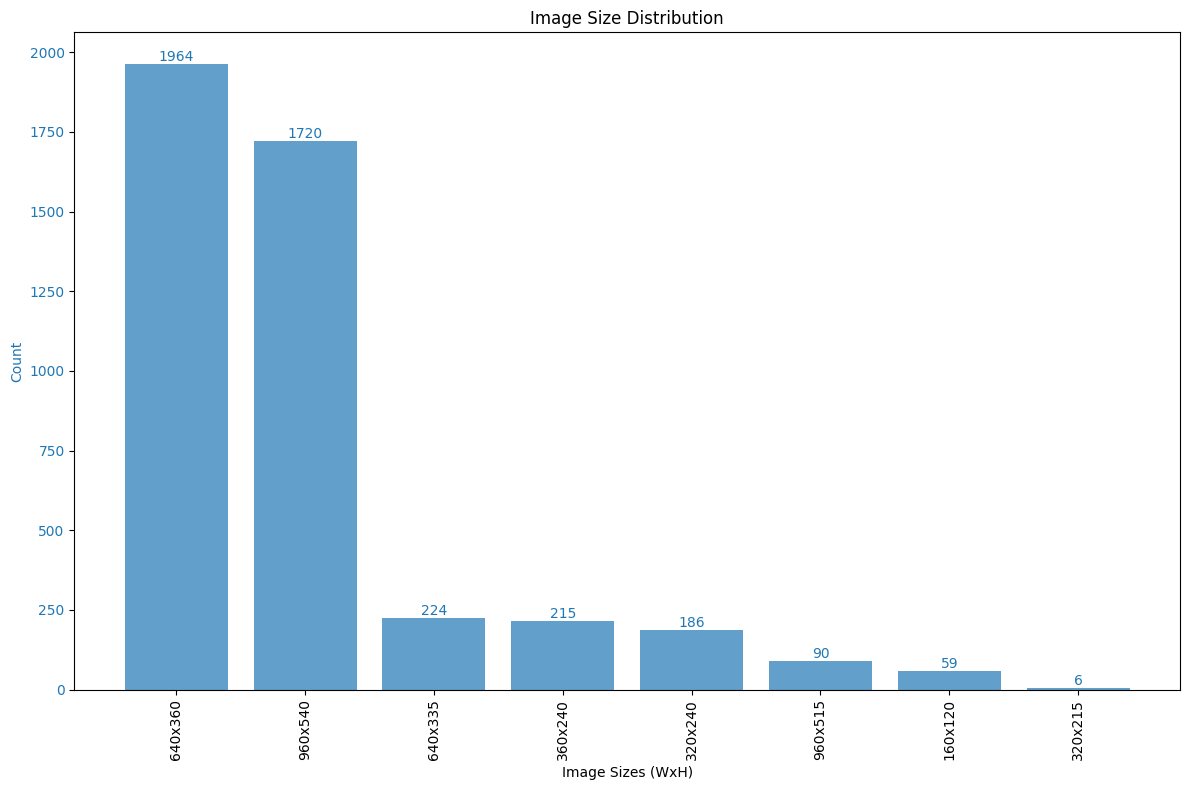

In [33]:
from PIL import Image
import matplotlib.pyplot as plt
from collections import defaultdict

# Path to the text file containing the list of image paths
file_list_path = '/Users/alexandersimakov/Documents/CAPSTONE/ds-capstone-project/notebooks/test_paths.txt'


# Read image paths from the text file
with open(file_list_path, 'r') as file:
    file_paths = file.readlines()

# Remove any trailing newline characters from the file paths
file_paths = [line.strip() for line in file_paths]

# Initialize a dictionary to count images by their dimensions
size_counts = defaultdict(int)

# Define a function to get the size of the image and update counts
def get_image_size(file_path):
    try:
        with Image.open(file_path) as img:
            size = img.size
            size_counts[size] += 1
            return size
    except Exception as e:
        print(f'Error processing {file_path}: {e}')
        return None

# Process each image to count sizes
for file_path in file_paths:
    size = get_image_size(file_path)
    if size:
        print(f'{file_path}: {size}')

# Sort sizes by count from highest to lowest
sorted_sizes = sorted(size_counts.items(), key=lambda x: x[1], reverse=True)

# Unpack sorted sizes and counts
sizes, counts = zip(*sorted_sizes)
percentages = [(count / sum(counts)) * 100 for count in counts]

# Print counts and percentages for each size
print("\nSize Counts:")
for size, count in zip(sizes, counts):
    print(f'{size}: {count} ({percentages[sizes.index(size)]:.2f}%)')

# Plot the results
sizes_labels = [f'{w}x{h}' for (w, h) in sizes]

plt.figure(figsize=(12, 8))

# Create a bar chart with counts for image sizes
fig, ax = plt.subplots(figsize=(12, 8))

# Plot counts
color = 'tab:blue'
ax.set_xlabel('Image Sizes (WxH)')
ax.set_ylabel('Count', color=color)
bars = ax.bar(sizes_labels, counts, color=color, alpha=0.7)
ax.tick_params(axis='y', labelcolor=color)

# Add count labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height,
            f'{height}', ha='center', va='bottom', color=color)

# Add title and show the plot
plt.title('Image Size Distribution')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
fig.tight_layout()
plt.savefig('image_size_distribution_sorted.png')


As we can see the most of pictures are 640x360.